In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from gensim.utils import simple_preprocess

In [2]:
dataset = pd.read_csv('/Users/test/Desktop/news_cato/dataset/trainset/combined_csv.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})
ds = pd.read_csv('/Users/test/Desktop/news_cato/dataset/ndtv_data_2023.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})

In [3]:
dataset.isnull().sum()

headline    84
category     0
dtype: int64

In [4]:
ds.isnull().sum()

headline    0
category    0
dtype: int64

In [5]:
dataset.dropna(inplace = True)
ds.dropna(inplace = True)

In [6]:
dataset.category.value_counts()

FMCG                             12892
Health & Wellness                 8743
Auto & Ancillary                  6447
E-Commerce & IT                   6348
Handsets                          5570
BFSI                              5330
Communications                    5042
OTT, Gaming & Digital Content     3840
Retail                            2862
Construction & Real Estate        2025
Fashion & Lifestyle               1709
Liquor & Tobacco                  1500
Internet based service            1459
Consumer Electronics              1197
Ed-Tech                           1150
E-health                          1075
Media & Entertainment              997
Name: category, dtype: int64

In [7]:
ds.category.value_counts()

Handsets                      565
E-Commerce & IT               501
Construction & Real Estate     68
FMCG                            1
Name: category, dtype: int64

<Axes: >

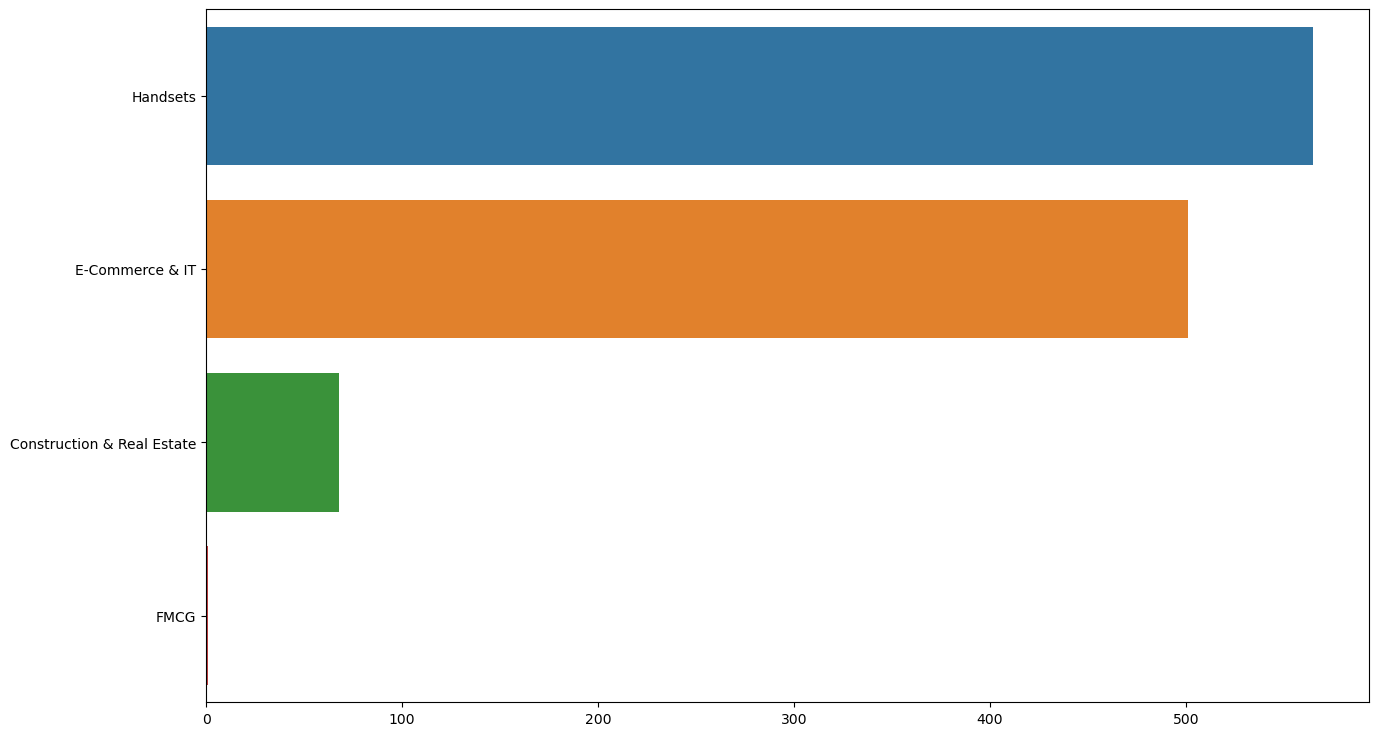

In [8]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = ds['category'].value_counts().values,y=ds['category'].value_counts().index)

In [9]:
dataset.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
dataset.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
dataset.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
dataset.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
dataset.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
dataset.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
dataset.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
dataset.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
dataset.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
dataset.category.replace("Internet based service", "Internet_based_service", inplace=True)


dataset.category.unique()

array(['OTT,_Gaming_&_Digital_Content', 'Auto_&_Ancillary', 'FMCG',
       'E-health', 'Internet_based_service', 'Retail',
       'Consumer_Electronics', 'Ed-Tech', 'Liquor_&_Tobacco',
       'Fashion_&_Lifestyle', 'Handsets', 'E-Commerce_&_IT',
       'Construction_&_Real_Estate', 'BFSI', 'Health_&_Wellness',
       'Communications', 'Media_&_Entertainment'], dtype=object)

In [10]:
ds.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
ds.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
ds.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
ds.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
ds.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
ds.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
ds.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
ds.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
ds.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
ds.category.replace("Internet based service", "Internet_based_service", inplace=True)


ds.category.unique()

array(['E-Commerce_&_IT', 'Handsets', 'Construction_&_Real_Estate',
       'FMCG'], dtype=object)

<Axes: >

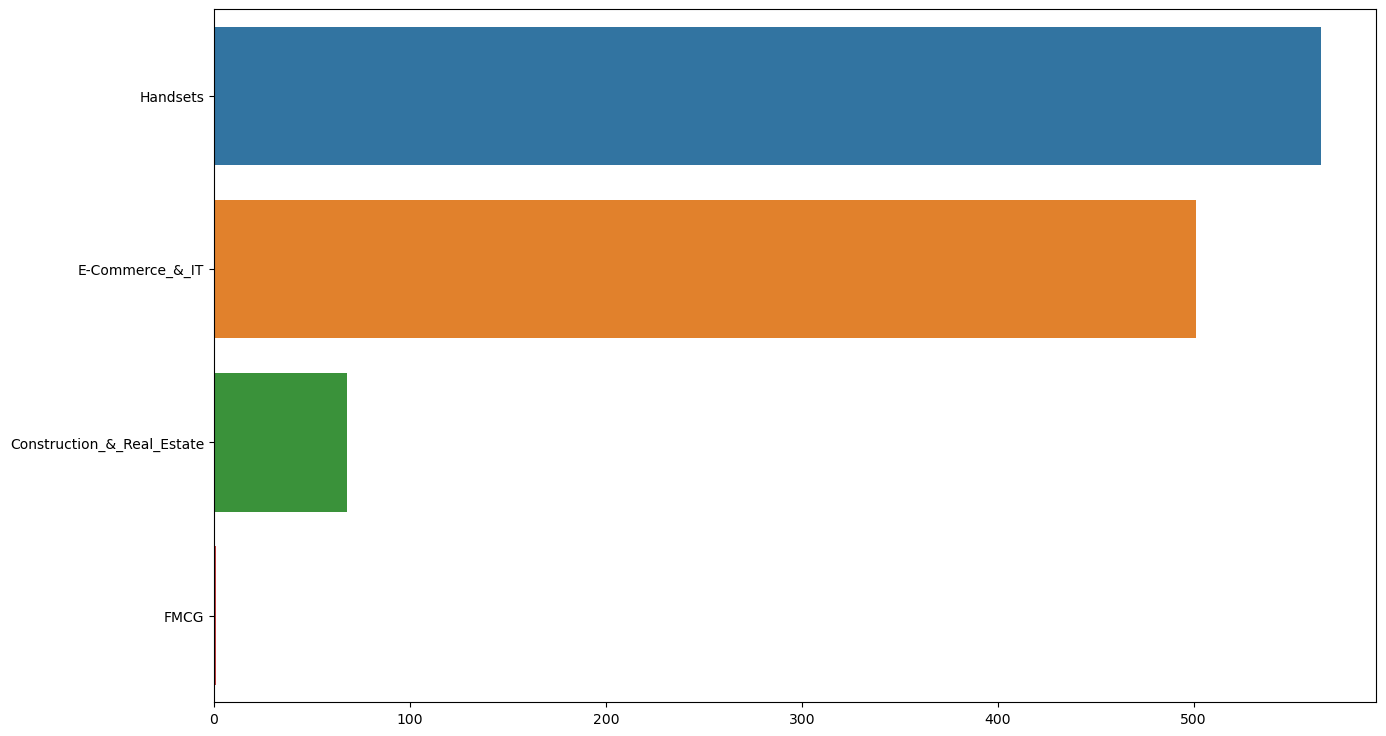

In [11]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = ds['category'].value_counts().values,y=ds['category'].value_counts().index)

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

In [13]:
#tags
def remove_tags(headline):
    remove = re.compile(r'')
    return re.sub(remove, '', headline)
dataset['headline'] = dataset['headline'].apply(remove_tags)
ds['headline'] = ds['headline'].apply(remove_tags)

In [14]:
#special char
def special_char(headline):
    reviews = ''
    for x in headline:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['headline'] = dataset['headline'].apply(special_char)
ds['headline'] = ds['headline'].apply(special_char)

In [15]:
#lower case
def convert_lower(headline):
    return headline.lower()
dataset['headline'] = dataset['headline'].apply(convert_lower)
ds['headline'] = ds['headline'].apply(convert_lower)

In [16]:
#stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [17]:
#tokens
def remove_stopwords(headline):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(headline)
    return [x for x in words if x not in stop_words]
dataset['headline'] = dataset['headline'].apply(remove_stopwords)
ds['headline'] = ds['headline'].apply(remove_stopwords)

In [18]:
#lemmatization
def lemmatize_word(headline):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in headline])
dataset['headline'] = dataset['headline'].apply(lemmatize_word)
ds['headline'] = ds['headline'].apply(lemmatize_word)

In [19]:
dataset['category'].unique(), ds['category'].unique()

(array(['OTT,_Gaming_&_Digital_Content', 'Auto_&_Ancillary', 'FMCG',
        'E-health', 'Internet_based_service', 'Retail',
        'Consumer_Electronics', 'Ed-Tech', 'Liquor_&_Tobacco',
        'Fashion_&_Lifestyle', 'Handsets', 'E-Commerce_&_IT',
        'Construction_&_Real_Estate', 'BFSI', 'Health_&_Wellness',
        'Communications', 'Media_&_Entertainment'], dtype=object),
 array(['E-Commerce_&_IT', 'Handsets', 'Construction_&_Real_Estate',
        'FMCG'], dtype=object))

In [20]:
dataset.iloc[:, 1] = dataset.iloc[:, 1].apply(lambda x: '__label__' + x)
ds.iloc[:, 1] = ds.iloc[:, 1].apply(lambda x: '__label__' + x)

In [21]:
import csv

In [22]:
# Saving the CSV file as a text file to train/test the classifier
dataset[['category', 'headline']].to_csv('train4.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " "
                                        )

ds[['category', 'headline']].to_csv('test4.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " "
                                   )

In [23]:
import fasttext

In [24]:
model = fasttext.train_supervised('train4.txt', wordNgrams = 3, epoch = 400, lr = 0.8)

Read 0M words
Number of words:  31927
Number of labels: 17
Progress: 100.0% words/sec/thread:  641755 lr:  0.000000 avg.loss:  0.047717 ETA:   0h 0m 0s 16.0% words/sec/thread:  621864 lr:  0.672067 avg.loss:  0.110888 ETA:   0h 2m31s 50.2% words/sec/thread:  645904 lr:  0.398147 avg.loss:  0.067735 ETA:   0h 1m26s 55.8% words/sec/thread:  633858 lr:  0.353259 avg.loss:  0.064918 ETA:   0h 1m17s 67.7% words/sec/thread:  640952 lr:  0.258144 avg.loss:  0.059333 ETA:   0h 0m56s 84.2% words/sec/thread:  641280 lr:  0.126626 avg.loss:  0.052617 ETA:   0h 0m27s 86.0% words/sec/thread:  640533 lr:  0.112278 avg.loss:  0.051957 ETA:   0h 0m24s 0.108339 avg.loss:  0.051856 ETA:   0h 0m23s0.050741 ETA:   0h 0m17s


In [25]:
model.save_model("news3.bin")

In [26]:
result = model.test('test4.txt')

precision = result[1]  # Precision
recall = result[2]     # Recall
accuracy = (precision + recall) / 2 

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [27]:
model.predict(ds.iloc[17, 0])

(('__label__FMCG',), array([0.32128614]))

In [28]:
# Initialize and train an unsupervised FastText model on your preprocessed headlines
unsupervised_model = fasttext.train_unsupervised('train4.txt', model='cbow', dim=100, epoch=400)

Read 0M words
Number of words:  11050
Number of labels: 17
Progress: 100.0% words/sec/thread:  108742 lr:  0.000000 avg.loss:  0.948504 ETA:   0h 0m 0s0h23m46s  2.2% words/sec/thread:   95381 lr:  0.048921 avg.loss:  2.003113 ETA:   0h19m 7s102495 lr:  0.046414 avg.loss:  1.536718 ETA:   0h16m53s  9.2% words/sec/thread:  103203 lr:  0.045403 avg.loss:  1.473104 ETA:   0h16m24s  9.9% words/sec/thread:  104113 lr:  0.045032 avg.loss:  1.453308 ETA:   0h16m 7s 15.0% words/sec/thread:  105615 lr:  0.042488 avg.loss:  1.369339 ETA:   0h15m 0s 20.9% words/sec/thread:  106679 lr:  0.039539 avg.loss:  1.334043 ETA:   0h13m49sh13m48s 23.1% words/sec/thread:  106516 lr:  0.038467 avg.loss:  1.331954 ETA:   0h13m28s13m14s 24.2% words/sec/thread:  106978 lr:  0.037897 avg.loss:  1.332601 ETA:   0h13m12s 0.037533 avg.loss:  1.331637 ETA:   0h13m 3s 28.2% words/sec/thread:  107545 lr:  0.035898 avg.loss:  1.328510 ETA:   0h12m26s 31.1% words/sec/thread:  108389 lr:  0.034443 avg.loss:  1.325205 ETA:

In [30]:
# Save the FastText model word vectors as a .vec file
# unsupervised_model.save_vectors('unsupervised_word_vectors.vec')

# Get the word vectors from the unsupervised model
word_vectors = unsupervised_model.get_words(include_freq=False)

# Create a dictionary to store word vectors
word_vector_dict = {}
for word in word_vectors:
    word_vector_dict[word] = unsupervised_model.get_word_vector(word)

# Save word vectors to a .vec file
with open('unsupervised_word_vectors.vec', 'w', encoding='utf-8') as vec_file:
    for word, vector in word_vector_dict.items():
        vec_file.write(f"{word} {' '.join(map(str, vector))}\n")


In [31]:
# Load your pre-trained model with the unsupervised word vectors
pretrained_model = fasttext.load_model('news3.bin')
pretrained_model.pretrained_vectors = 'unsupervised_word_vectors.vec'

In [32]:
# Create embeddings for your training dataset using the pre-trained model
embeddings = []
for headline in dataset['headline']:
    embedding = pretrained_model.get_sentence_vector(headline)
    embeddings.append(embedding)

In [33]:
# Save these embeddings to a file
np.savetxt('training_embeddings.txt', embeddings)

In [41]:
with open('unsupervised_word_vectors.vec', 'r', encoding='utf-8') as vec_file:
    first_line = next(vec_file)
    dimensions = len(first_line.split()) - 1
print(f"Dimension of pretrained vectors: {dimensions}")


Dimension of pretrained vectors: 100


In [43]:
# Initialize variables to count dimensions
max_text_length = 0
max_label_length = 0

# Specify the path to your train3.txt file
train_file_path = 'train4.txt'

# Open and read the train3.txt file
with open(train_file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        label = parts[0]
        text = ' '.join(parts[1:])
        
        text_length = len(text.split())
        label_length = len(label.split())
        
        # Update max dimensions
        if text_length > max_text_length:
            max_text_length = text_length
        if label_length > max_label_length:
            max_label_length = label_length

# Print the maximum dimensions
print(f"Maximum text dimension: {max_text_length}")
print(f"Maximum label dimension: {max_label_length}")


Maximum text dimension: 31
Maximum label dimension: 1


In [46]:
new_model = fasttext.train_unsupervised('train4.txt', pretrained_vectors='unsupervised_word_vectors.vec', dim=100, epoch=400)


Read 0M words
Number of words:  11050
Number of labels: 17


ValueError: Dimension of pretrained vectors (140732917146672) does not match dimension (100)!

In [ ]:

# Test the new model with your testing dataset
result = new_model.test('test4.txt')

precision = result[1]  # Precision
recall = result[2]     # Recall
accuracy = (precision + recall) / 2 

print(f"Accuracy: {accuracy:.2f}")

# You can save this new model if needed
new_model.save_model("new_model.bin")

In [ ]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
# import re
# import fasttext

In [ ]:
# pre_trained_model = fasttext.load_model("/Users/test/Desktop/news_cato/cc.en.300.bin")

In [ ]:
# #stopwords
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

In [ ]:

# # Function to preprocess and embed headlines
# def preprocess_and_embed(headline, pre_trained_model):
#     # Remove HTML tags (already performed)
#     headline = re.sub(r'', '', headline)
    
#     # Remove special characters (already performed)
#     headline = ''.join(e for e in headline if e.isalnum() or e.isspace())
    
#     # Convert to lowercase (already performed)
#     headline = headline.lower()
    
#     # Remove stopwords (already performed)
#     stop_words = set(nltk.corpus.stopwords.words('english'))
#     words = word_tokenize(headline)
#     words = [word for word in words if word not in stop_words]
#     headline = ' '.join(words)
    
#     # Lemmatization (already performed)
#     wordnet = WordNetLemmatizer()
#     words = word_tokenize(headline)
#     words = [wordnet.lemmatize(word) for word in words]
#     headline = ' '.join(words)
    
#     # Tokenize the headline
#     tokens = headline.split()

#     # Initialize an empty list to store word embeddings
#     embeddings = []

#     # Iterate through tokens and map each to pre-trained embeddings
#     for token in tokens:
#         try:
#             embedding = pre_trained_model.get_word_vector(token)
#             embeddings.append(embedding)
#         except:
#             # Handle out-of-vocabulary words
#             pass

#     # If no embeddings were found for any words, return zeros
#     if not embeddings:
#         return np.zeros(pre_trained_model.get_dimension())

#     # Calculate the mean of word embeddings to get the headline embedding
#     headline_embedding = np.mean(embeddings, axis=0)
    
#     return headline_embedding


In [ ]:
# # Apply the preprocess_and_embed function to each headline in the training dataset
# dataset['embedding'] = dataset['headline'].apply(lambda x: preprocess_and_embed(x, pre_trained_model))

# # Apply the preprocess_and_embed function to each headline in the testing dataset
# ds['embedding'] = ds['headline'].apply(lambda x: preprocess_and_embed(x, pre_trained_model))

In [ ]:
# dataset.iloc[:, 1] = dataset.iloc[:, 1].apply(lambda x: '__label__' + x)
# ds.iloc[:, 1] = ds.iloc[:, 1].apply(lambda x: '__label__' + x)

In [ ]:
# import csv

In [ ]:
# # Saving the CSV file as a text file to train/test the classifier
# dataset[['category', 'headline', 'embedding']].to_csv('train4.txt', 
#                                           index = False, 
#                                           sep = ' ',
#                                           header = None, 
#                                           quoting = csv.QUOTE_NONE, 
#                                           quotechar = "", 
#                                           escapechar = " "
#                                         )

# ds[['category', 'headline', 'embedding']].to_csv('test4.txt', 
#                                      index = False, 
#                                      sep = ' ',
#                                      header = None, 
#                                      quoting = csv.QUOTE_NONE, 
#                                      quotechar = "", 
#                                      escapechar = " "
#                                    )

In [ ]:
# import fasttext

In [ ]:
# model = fasttext.train_supervised('train4.txt', wordNgrams = 2, epoch = 300, lr = 0.8)

In [ ]:
# model.save_model("news3.bin")

In [ ]:
# model.test('test4.txt') 

In [ ]:
# result = model.test('test4.txt')

# precision = result[1]  # Precision
# recall = result[2]     # Recall
# accuracy = (precision + recall) / 2 

# print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# model.predict(ds.iloc[17, 0])

In [ ]:
# Define and train your FastText classifier (after loading the pre-trained model)
# You can use the embeddings in the 'embedding' column as input features
model = fasttext.train_supervised('train4.txt', wordNgrams=3, epoch=300, lr=0.8)

# Save the trained model if needed
model.save_model("trained_news_classifier.bin")